# 1. Install Dependencies and Setup

In [3]:
!pip install --upgrade pip setuptools wheel
!pip install tensorflow opencv-python matplotlib

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\reabi\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip setuptools wheel



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.2.2
asttokens               3.0.0
astunparse              1.6.3
certifi                 2025.1.31
charset-normalizer      3.4.1
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.14
decorator               5.2.1
executing               2.2.0
flatbuffers             25.2.10
fonttools               4.57.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.71.0
h5py                    3.13.0
idna                    3.10
ipykernel               6.29.5
ipython                 9.1.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.9.2
kiwisolver              1.4.8
libclang                18.1.1
Markdown                3.8
markdown-it-py          3.0.0
MarkupSafe           

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

C:\Users\reabi\AppData\Local\Temp\ipykernel_2348\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

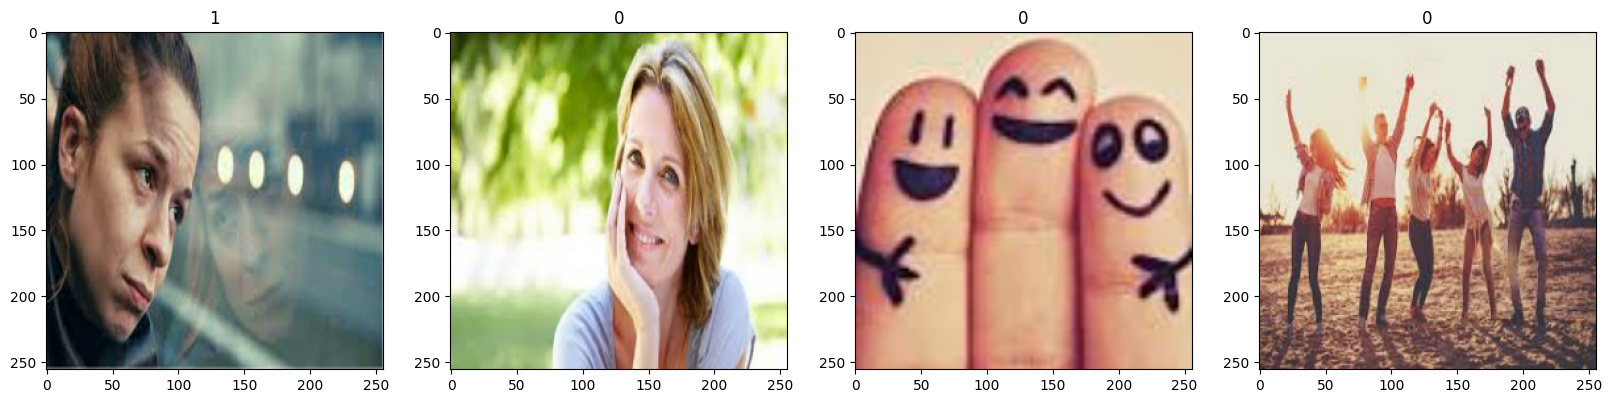

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[5.06495118e-01, 5.69240212e-01, 5.26102960e-01],
          [5.21323502e-01, 5.84068656e-01, 5.40931344e-01],
          [5.35539210e-01, 5.98284304e-01, 5.49019635e-01],
          ...,
          [9.65563715e-01, 9.61642146e-01, 9.53799009e-01],
          [9.68627453e-01, 9.64705884e-01, 9.56862748e-01],
          [9.68627453e-01, 9.64705884e-01, 9.56862748e-01]],
 
         [[5.06495118e-01, 5.69240212e-01, 5.26102960e-01],
          [5.21323502e-01, 5.84068656e-01, 5.40931344e-01],
          [5.35539210e-01, 5.98284304e-01, 5.49019635e-01],
          ...,
          [9.64868426e-01, 9.60946858e-01, 9.53103721e-01],
          [9.65448856e-01, 9.61527288e-01, 9.53684151e-01],
          [9.65448856e-01, 9.61527288e-01, 9.53684151e-01]],
 
         [[5.06495118e-01, 5.69240212e-01, 5.26102960e-01],
          [5.21323502e-01, 5.84068656e-01, 5.40931344e-01],
          [5.35539210e-01, 5.98284304e-01, 5.49019635e-01],
          ...,
          [9.64705884e-01, 9.60784316e-01, 9.5294

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\reabi\ImageClassification\imageclassification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 814ms/step - accuracy: 0.4668 - loss: 1.0373 - val_accuracy: 0.3594 - val_loss: 0.6955
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 900ms/step - accuracy: 0.5753 - loss: 0.6889 - val_accuracy: 0.7656 - val_loss: 0.6776
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 678ms/step - accuracy: 0.6426 - loss: 0.6664 - val_accuracy: 0.6094 - val_loss: 0.6334
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - accuracy: 0.6493 - loss: 0.6119 - val_accuracy: 0.8125 - val_loss: 0.6120
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.8260 - loss: 0.5897 - val_accuracy: 0.9062 - val_loss: 0.5026
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 887ms/step - accuracy: 0.8851 - loss: 0.4758 - val_accuracy: 0.8281 - val_loss: 0.4032
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 746ms/step - accuracy: 0.7596 - loss: 0.4616 - val_accuracy: 0.8594 - val_loss: 0.3576
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 708ms/step - accuracy: 0.8976 - loss: 0.3684 - val_accuracy: 0.9375 - val_loss

# 8. Plot Performance

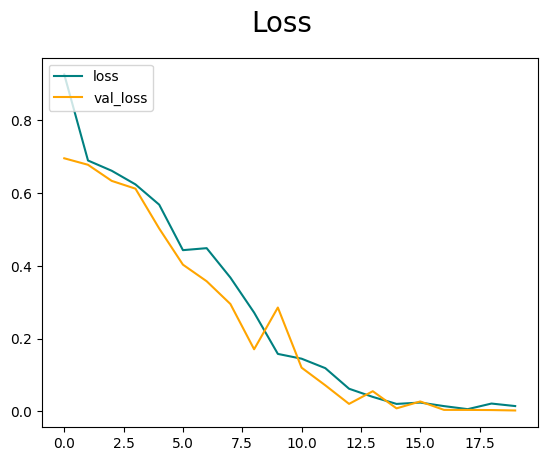

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

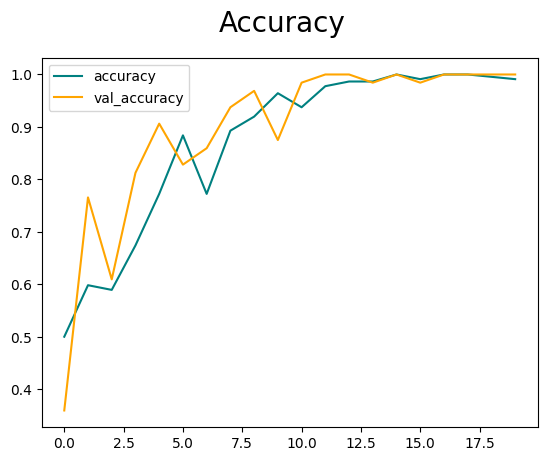

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [36]:
import cv2

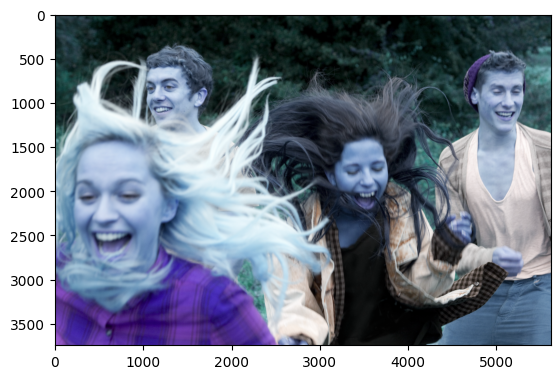

In [37]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

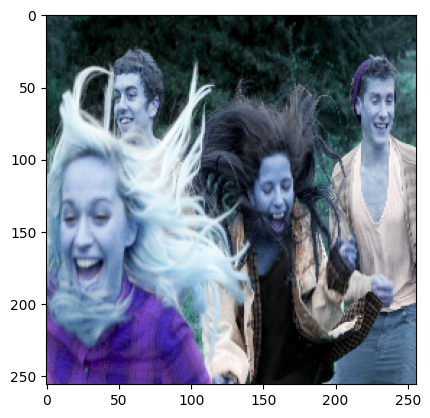

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


In [40]:
yhat

array([[0.0342047]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','imageclassifier.h5'))

In [44]:
new_model = load_model('imageclassifier.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'imageclassifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [46]:
git init
git add .
git commit -m "Initial commit from Jupyter"

SyntaxError: invalid syntax (2770116418.py, line 1)